# Heart Disease Exploratory Data Analysis

## Dataset
https://www.kaggle.com/datasets/neurocipher/heartdisease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('Heart_Disease_Prediction.csv')

# Basic Information

In [6]:
# Inspect the first 5 rows to understand the structure
'''print("First 5 rows of the dataset:")'''
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [8]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

# Analysis

In [11]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [12]:
# Calculate basic stats (Mean, Sum, Min, Max)
stats_df = df[numeric_cols].agg(['mean', 'sum', 'min', 'max'])

In [13]:
# Calculate Range manually
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

In [14]:
# Display the transposed dataframe for better readability
print("Descriptive Statistics:")
print(stats_df.T)

Descriptive Statistics:
                               mean      sum    min    max  range
Age                       54.433333  14697.0   29.0   77.0   48.0
Sex                        0.677778    183.0    0.0    1.0    1.0
Chest pain type            3.174074    857.0    1.0    4.0    3.0
BP                       131.344444  35463.0   94.0  200.0  106.0
Cholesterol              249.659259  67408.0  126.0  564.0  438.0
FBS over 120               0.148148     40.0    0.0    1.0    1.0
EKG results                1.022222    276.0    0.0    2.0    2.0
Max HR                   149.677778  40413.0   71.0  202.0  131.0
Exercise angina            0.329630     89.0    0.0    1.0    1.0
ST depression              1.050000    283.5    0.0    6.2    6.2
Slope of ST                1.585185    428.0    1.0    3.0    2.0
Number of vessels fluro    0.670370    181.0    0.0    3.0    3.0
Thallium                   4.696296   1268.0    3.0    7.0    4.0


#### Key Findings:

Age: The average age of patients is approx. 54.4 years, ranging from 29 to 77.

Cholesterol: The average cholesterol is 249.6, with a very wide range (126 to 564), indicating significant variance in patient health.

Max HR: The maximum heart rate achieved ranges from 71 to 202, with a mean of roughly 150.

# Visualizations

In [15]:
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0, 0.5, 'Frequency')

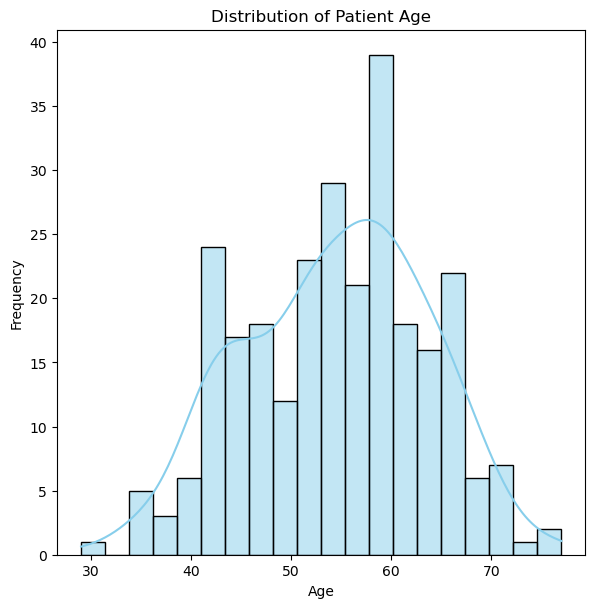

In [32]:
# Visualization 1: Histogram of Age
# Understanding the age demographics of the dataset
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

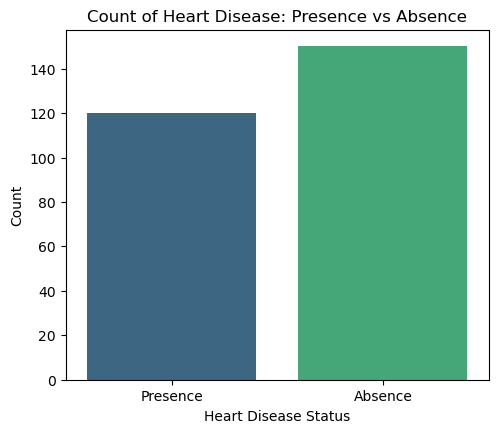

In [37]:
# Visualization 2: Bar Chart of Heart Disease Status
# Checking for class imbalance in the target variable
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 2)
sns.countplot(x='Heart Disease', data=df, hue='Heart Disease', palette='viridis')
plt.title('Count of Heart Disease: Presence vs Absence')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')

Text(0, 0.5, 'Max Heart Rate')

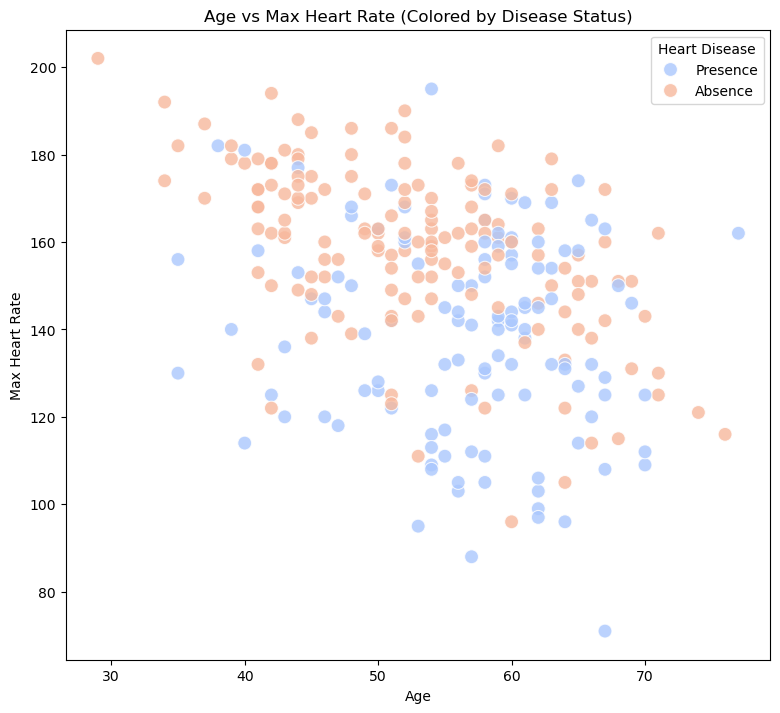

In [38]:
# Visualisation 3: Scatter Plot of Age vs Max Heart Rate
# Investigating if older patients achieve lower max heart rates
plt.figure(figsize=(20,18))
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Max HR', hue='Heart Disease', data=df, palette='coolwarm', s=100, alpha=0.8)
plt.title('Age vs Max Heart Rate (Colored by Disease Status)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')

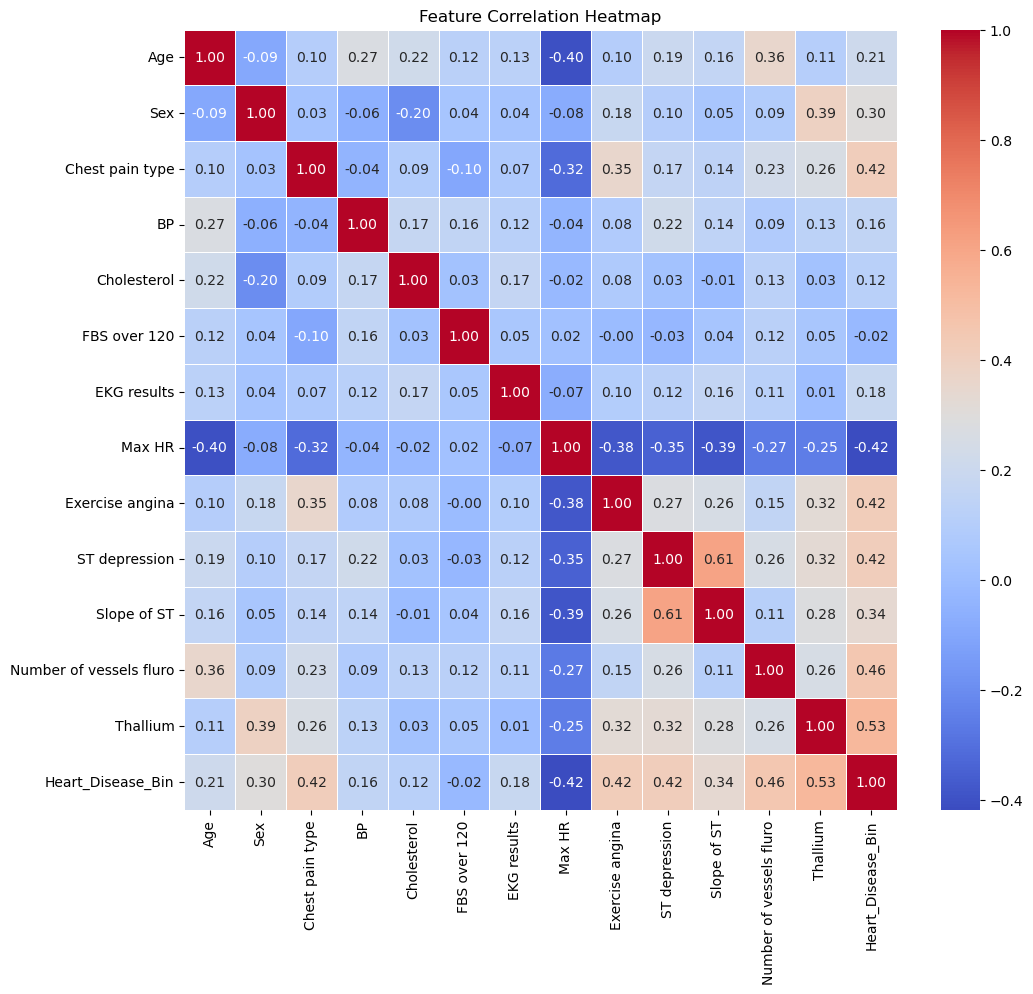

In [29]:
# Visualisation 4: Correlation Heatmap
# Identifying relationships between numerical features
# Create a binary mapping for correlation calculation
df['Heart_Disease_Bin'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
plt.figure(figsize=(20,18))
plt.subplot(2, 2, 4)
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.savefig('eda_visualizations.png') # Saving the plot
plt.show()

#### Visual Insights:

Age Distribution: The age distribution is roughly normal but slightly left-skewed, centered around the mid-50s.

Target Balance: The dataset is relatively balanced, though 'Absence' (Healthy) cases are slightly more frequent than 'Presence'.

Age vs Max HR: There is a clear downward trend; as age increases, maximum heart rate decreases. Interestingly, many "Presence" (red dots) cases appear at lower Max HRs for the same age.

Heatmap: Variables like Chest pain type, Exercise angina, and Number of vessels fluro show noticeable positive correlations with the target variable (Heart_Disease_Bin).

# Q&A

### 1. How does Chest Pain Type relate to the presence of Heart Disease?

In [22]:
# Grouping by Chest Pain Type and calculating the percentage of Heart Disease
q1_tab = pd.crosstab(df['Chest pain type'], df['Heart Disease'], normalize='index') * 100
print("Percentage of Heart Disease by Chest Pain Type:\n", q1_tab)

Percentage of Heart Disease by Chest Pain Type:
 Heart Disease      Absence   Presence
Chest pain type                      
1                75.000000  25.000000
2                83.333333  16.666667
3                78.481013  21.518987
4                29.457364  70.542636


### 2. Is there a significant difference in Cholesterol levels between patients with and without heart disease?

In [23]:
# Grouping by Heart Disease to see mean cholesterol
q2_stats = df.groupby('Heart Disease')['Cholesterol'].describe()[['mean', 'std']]
print("Cholesterol Stats:\n", q2_stats)

Cholesterol Stats:
                      mean        std
Heart Disease                       
Absence        244.213333  54.019085
Presence       256.466667  47.969166


### 3. What is the statistical correlation between Age and Max Heart Rate?

In [24]:
# Calculating Pearson correlation coefficient
age_hr_corr = df['Age'].corr(df['Max HR'])
print(f"Correlation between Age and Max HR: {age_hr_corr:.4f}")

Correlation between Age and Max HR: -0.4022


### 4. How does Heart Disease prevalence differ by Gender?

In [25]:
# Mapping 1 to Male and 0 to Female (standard in this dataset context)
df['Sex_Label'] = df['Sex'].map({1: 'Male', 0: 'Female'})
q4_prop = pd.crosstab(df['Sex_Label'], df['Heart Disease'], normalize='index') * 100
print("Proportion of Heart Disease by Gender (%):\n", q4_prop)

Proportion of Heart Disease by Gender (%):
 Heart Disease    Absence   Presence
Sex_Label                          
Female         77.011494  22.988506
Male           45.355191  54.644809


# Summary

## Suggestion